# Mathematical Underpinnings - Lab 10

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import scale

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import Lasso

## Task 1

In [4]:
df = pd.read_csv('prostate.data', sep="\t", index_col=0)

In [5]:
X = np.array(df.iloc[:, 0:8])
Y = np.array(df.iloc[:, 8])

In [47]:
X = scale(X)
Y = scale(Y)
Y = Y.reshape(-1,1) 

### a)

In [11]:
mod_lars = Lars(fit_intercept=False)
mod_lars.fit(X,Y)

Lars(fit_intercept=False)

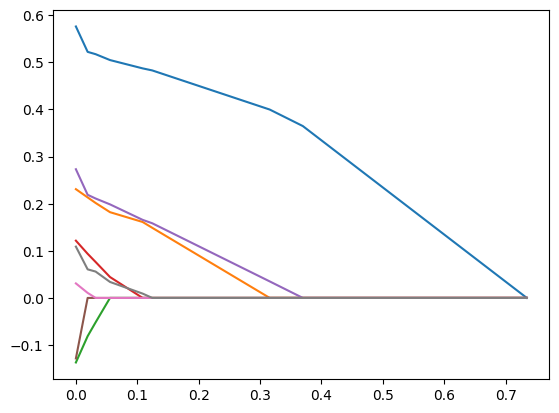

In [12]:
plt.plot(mod_lars.alphas_,mod_lars.coef_path_.T)
plt.show()

Order in which the variables are included in the model:

In [125]:
variables = df.drop(['lpsa','train'],axis=1).columns
idx_sorted = np.argsort(mod_lars.coef_)[::-1]
print(idx_sorted)
print([variables[i] for i in idx_sorted])

[0 4 1 3 7 6 5 2]
['lcavol', 'svi', 'lweight', 'lbph', 'pgg45', 'gleason', 'lcp', 'age']


### b)

In [14]:
mod_lars.alphas_[0]

0.7344603262136732

### b1)

In [15]:
selected_variables = []

In [126]:
y_correlation = np.corrcoef(X,Y,rowvar=False)[:-1,8]
s1 = np.argmax(y_correlation)
alpha1 = np.max(y_correlation)
print(s1,alpha1)

0 0.7344603262136735


In [19]:
selected_variables.append(s1)

### b2)

In [26]:
X[:,0].shape

(97,)

In [48]:
mod1 = LinearRegression(fit_intercept=False)
mod1.fit(X[:,s1].reshape(-1,1),Y)
beta1 = mod1.coef_[0,0]
print(beta1)

0.7344603262136731


### b3)

In [49]:
# code 
Y_hat = mod1.predict(X[:,s1].reshape(-1,1))
alphas = np.linspace(0,1,100)
corr_values = []
for i in range(100):
    r_i = Y - alphas[i] * Y_hat
    corr_values.append(np.corrcoef(X,r_i,rowvar=False)[:-1,8])
correls = np.array(corr_values)

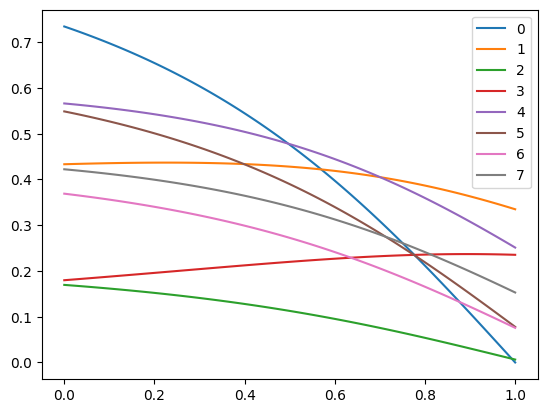

In [50]:
# plot
plt.plot(alphas,correls)
plt.legend(range(8))
plt.show()

blue line  
### b4)

In [94]:
alpha2t_guess = 0.5
r = Y - alpha2t_guess * Y_hat
print('Corr1',np.corrcoef(r,X[:,s1].reshape(-1,1),rowvar=False)[0,1])
print('Corr2',np.corrcoef(r,X[:,4].reshape(-1,1),rowvar=False)[0,1])
s2 = 4

Corr1 0.4759095723474519
Corr2 0.47734537579687364


### b5)

$$ \textrm{Cor}(Y - \tilde\alpha\hat Y, X_i) = ... \cdot\textrm{Cor}(Y, X_i) - ... \cdot \tilde\alpha \cdot \textrm{Cor}(\tilde\alpha\hat Y, X_i) $$

In our case, $i=0$, $j=4$:
$$ |\textrm{Cor}(Y - \tilde\alpha\hat Y, X_i)| = |\textrm{Cor}(Y - \tilde\alpha\hat Y, X_j)|$$

In [87]:
# plot
alphas = np.linspace(0,1,100)
vals = np.zeros((100, 8))
for i in range(8):
    vals[:, i] = np.sqrt(np.var(Y)) * np.corrcoef(Y, X[:,i], rowvar=False)[0,1] - np.sqrt(np.var(Y_hat)) * alphas * np.corrcoef(Y_hat,X[:,i],rowvar=False)[0,1]

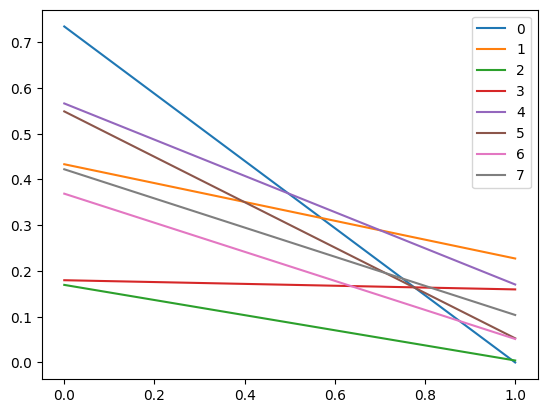

In [88]:
plt.plot(alphas,vals)
plt.legend(range(8))
plt.show()

In [102]:
# code
alpha2t_exact =  (np.sqrt(np.var(Y)) * np.corrcoef(Y, X[:,s1], rowvar=False)[0,1] - np.sqrt(np.var(Y)) * np.corrcoef(Y,X[:,s2],rowvar=False)[0,1]) /  (np.sqrt(np.var(Y_hat)) * np.corrcoef(Y_hat, X[:,s1], rowvar=False)[0,1] - np.sqrt(np.var(Y_hat)) * np.corrcoef(Y_hat,X[:,s2],rowvar=False)[0,1])
alpha2t_exact

0.4967289013871957

### b6)

In [98]:
alpha2 =  np.sqrt(np.var(Y)) * np.corrcoef(Y, X[:,s2], rowvar=False)[0,1] - np.sqrt(np.var(Y_hat)) * alpha2t_exact * np.corrcoef(Y_hat,X[:,s2],rowvar=False)[0,1]
alpha2

0.36963265526107436

In [103]:
r2 = Y - alpha2t_exact* Y_hat
selected_variables.append(s2)

### b7)

In [106]:
mod2 = LinearRegression(fit_intercept=False)
mod2.fit(X[:,selected_variables],r2)

LinearRegression(fit_intercept=False)

In [109]:
beta2 = mod2.coef_[0,0]

In [110]:
beta2

0.24020135537841109

### b8)

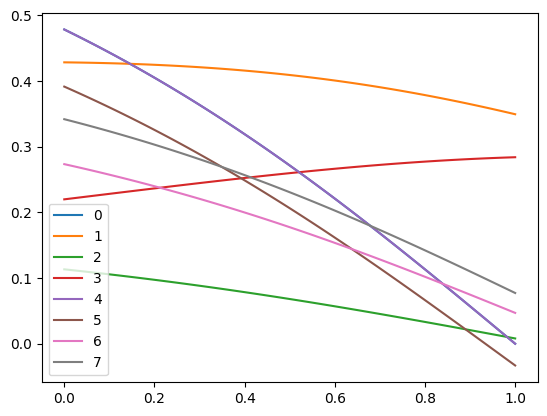

In [140]:
Y_hat2 = mod2.predict(X[:,selected_variables])
alphas = np.linspace(0,1,100)
corr_values2 = []
for i in range(100):
    r2_i = r2 - alphas[i] * Y_hat2
    corr_values2.append(np.corrcoef(X,r2_i,rowvar=False)[:-1,8])
correls2= np.array(corr_values2)
plt.plot(alphas,correls2)
plt.legend(range(8))
plt.show()

In [149]:
print(correls2[:6,0])
print(correls2[:6,4])

[0.47831254 0.47490238 0.47146148 0.4679897  0.4644869  0.46095295]
[0.47831254 0.47490238 0.47146148 0.4679897  0.4644869  0.46095295]


blue and purple lines which are overlapping
### b9)

In [119]:
alpha3t_guess = 0.15
s3 = 1

### b10)

In [122]:
alpha3t_exact =  (np.sqrt(np.var(r2)) * np.corrcoef(r2, X[:,s2], rowvar=False)[0,1] - np.sqrt(np.var(r2)) * np.corrcoef(r2,X[:,s3],rowvar=False)[0,1]) /  (np.sqrt(np.var(Y_hat2)) * np.corrcoef(Y_hat2, X[:,s2], rowvar=False)[0,1] - np.sqrt(np.var(Y_hat2)) * np.corrcoef(Y_hat2,X[:,s3],rowvar=False)[0,1])
alpha3t_exact

0.14590879649354668

### b11)

In [123]:
alpha3 =  np.sqrt(np.var(r2)) * np.corrcoef(r2, X[:,s3], rowvar=False)[0,1] - np.sqrt(np.var(Y_hat2)) * alpha3t_exact * np.corrcoef(Y_hat2,X[:,s3],rowvar=False)[0,1]
alpha3

0.3156999993872171

In [124]:
r3 = r2 - alpha3t_exact* Y_hat
selected_variables.append(s3)

### c)

## Task 2

In [ ]:
X = pd.read_table("data/SRBCT_X.txt", sep=" ")
Y = pd.read_table("data/SRBCT_Y.txt", sep=" ")

X = np.array(X)
Y = np.array(Y)[:,0]

In [ ]:
X = scale(X)
Y = Y - np.mean(Y)

### a)

In [ ]:
mod_lars = Lars(n_nonzero_coefs=80)
# fit

In [ ]:
# plot

In [ ]:
# the order

### b)

In [ ]:
mod_lassolars = LassoLars(alpha=0.15)
# fit

In [ ]:
# order

In [ ]:
# plot

### c)

In [ ]:
lasso_coef = np.zeros((X.shape[1], mod_lassolars.alphas_.shape[0]))

In [ ]:
for i in range(mod_lassolars.alphas_.shape[0]):
    mod_lasso = Lasso(alpha=mod_lassolars.alphas_[i])
    mod_lasso.fit(X, Y)

    lasso_coef[:,i] = mod_lasso.coef_

In [ ]:
# plot